In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

#### Exercise 6.2.1

Prove that $\overline{X}$, the mean of a random sample of size $n$ from a distribution that is $N(\theta,\sigma^2)$, $−\infty < \theta < \infty,$ is, for every known $\sigma^2 > 0$, an efficient estimator of $\theta$.

For samples from $N(\theta,\sigma^2)$, the Fischer information is easily computed as $I(\theta) = 1/\sigma^2$ so that Cramer-Rao Lower Bound is $1/(nI(\theta)) = \sigma^2/n.$ But the $var(\overline(X)) = 1/(nI(\theta)) = \sigma^2/n$ so the estimator attains the lower bound. Hence it is efficient for all $\sigma^2 > 0$.

#### Exercise 6.2.2

Given $f(x;\theta) = 1/\theta$, $0 < x < \theta$, zero elsewhere, with $\theta > 0$, formally compute the reciprocal of $$ nE \left \{ \left [ \cfrac { \partial \log f(X:\theta)}{ \partial \theta}  \right ]^2 \right \}, $$
Compare this with the variance of $(n + 1)Y_n /n$, where $Y_n$ is the largest observation of a random sample of size $n$ from this distribution. Comment.

The score function is basically $\frac{\partial \log f(X:\theta)}{ \partial \theta} = -1/\theta$ so that the required expectation is $$ nE \left \{ \left [ \cfrac { \partial \log f(X:\theta)}{ \partial \theta}  \right ]^2 \right \} = \frac{n}{\theta^2} $$ which means the lower bound is $\theta^2/n.$ 

Now for $Y_n$, we have its cdf $F_{Y_n}(y) = (y/\theta)^n$ using which the variance of $(n + 1)Y_n /n$ is computed as $\theta^2/[n (n+2)]$ which is lower than the lower bound. This is perhaps because regularity conditions are not satisfied.

#### Exercise 6.2.3

Given the pdf $$f(x;θ)= \cfrac{1}{[1+\pi (x - \theta)^2]},$$ $−\infty < \theta < \infty,$ and $−\infty < x < \infty,$ show that the Rao–Cramer lower bound is $2/n$, where $n$ is the size of a random sample from this Cauchy distribution. What is the asymptotic distribution of $ \sqrt{n} ( \hat{\theta} − \theta )$ if $\hat{\theta}$ is the mle of $\theta$?

The integral of the square of score function, ie that of the Fischer information expectation integral, is a nasty integral.

$$I(\theta) = \int_{-\infty}^{\infty} \frac{4(x-\theta)^2}{\pi[1+(x-\theta)^2]^3}dx.$$ The entire integral is evaluated in the solutions manual but I don't see the value in sweating through it. 

A cool technique is described by "whuber" in the comment to the answer in https://stats.stackexchange.com/a/145050/183497

$I(\theta)$ ends up being $1/2$.

From Theorem $6.2.2$, $ \sqrt{n} ( \hat{\theta} − \theta ) \xrightarrow{D} N(0,1/I(\theta))$ i.e $ \sqrt{n} ( \hat{\theta} − \theta ) \xrightarrow{D} N(0,2)$. 

#### Exercise 6.2.4. 

Consider Example $6.2.2,$ where we discussed the location model.

(a) Write the location model when $e_i$ has the logistic pdf given in expression $(4.4.11).$

(b) Using expression $(6.2.8),$ show that the information $I(\theta) = 1/3$ for the model in part (a).

(a) The logistic pdf is given by $f(x) = e^{-x}/(1+e^{-x})^2,$ $-\infty < x < \infty$. The equation $6.2.7$ is $X_i = \theta + e_i$, $i = 1,2, \cdots ,n,$ where $e_i$ are i.i.d and have the logistic pdf $f(x)$ given above.

(b) From equation $6.2.8$, we get $$I(\theta) = \int_{-\infty}^{\infty} \frac{e^{-z}(e^{-z} -1)^2}{(e^{-z} +1)^4} dz.$$ Substituting $y=e^{-x}+1$, we can evaluate the integral to get $I(\theta) = 1/3.$

#### Exercise 6.2.5. 

Using the same location model as in part (a) of Exercise $6.2.4$, obtain the ARE of the sample median to mle of the model.

With $I(\theta) = 1/3$, asymptotic variance of the mle by Theorem $6.2.2$ is $1/(nI(\theta)) = 3/n$, while that of the sample median, based on the hint, is $1/n$. So the ARE turns out to be $(1/n)/(3/n) = 1/3$.

#### Exercise 6.2.6. 

Consider a location model (Example $6.2.2$) when the error pdf is the contaminated normal $(3.4.17)$ with $\epsilon$ as the proportion of contamination and with $\sigma_c^2$ as the variance of the contaminated part. Show that the ARE of the sample median to the sample mean is given by

$$e(Q2,\overline{X}) = \frac{ 2[1 + \epsilon(\sigma_c^2 − 1)][1 − ε + (ε/σ_c)]^2 }{\pi}.$$ Use the hint in Exercise 6.2.5 for the median.

(a) If $σ_c^2 = 9,$ use $(6.2.34)$ to fill in the following table:

|$$\epsilon$$|0|0.05|0.1|0.15|
|---|---|---|---|---|
|$$e(Q2,\overline{X})$$ |||||

(b) Notice from the table that the sample median becomes the “better” estimator when $\epsilon$ increases from $0.10$ to $0.15$. Determine the value for $\epsilon$ where this occurs. \[this involves a third-degree polynomial in $\epsilon$, so one way of obtaining the root is to use the Newton algorithm discussed around expression $(6.2.32)$\]

(a) Variance of contaminated normal distribution based on equation $(3.4.16)$ is $1+\epsilon(\sigma_c^2-1)$, and the value of $4[f(0)]^2 = 2(1-\epsilon+\epsilon/\sigma_c^2)^2/\pi$ and the result follows directly from equation $(6.2.27).$

In [3]:
# (a)

eps = [e/100 for e in range(0,16,5)]

[2/np.pi*(1+e*(9-1))*(1-e+e/3)**2 for e in eps]

[0.6366197723675814,
 0.8328401333173225,
 0.9982198030723677,
 1.1344564343590302]

|$$\epsilon$$|0|0.05|0.1|0.15|
|---|---|---|---|---|
|$$e(Q2,\overline{X})$$ |0.6366|0.8328|0.9982|1.1344|

In [4]:
# (b)

def invert_are(eare):
    el = 0
    eh = 1
    de = 1
    while(de > 0.00001):
        em = (el+eh)/2
        earet = 2/np.pi*(1+em*(9-1))*(1-em+em/3)**2
        de = np.abs(earet-eare)
        if(earet > eare):
            eh = em
        else:
            el = em
    return em

In [5]:
invert_are(1)

0.10059356689453125

Value at which it median and mean have ARE of one is $0.10059356689453125$

#### Exercise 6.2.7

Recall Exercise $6.1.1$ where $X_1, X_2, . . . , X_n$ is a random sample on $X$ that has a $\Gamma(\alpha = 4, \beta = \theta) $ distribution, $0 < θ < ∞.$

(a) Find the Fisher information $I(\theta).$

(b) Show that the mle of $\theta$, which was derived in Exercise $6.1.1$, is an efficient estimator of $\theta$.

(c) Using Theorem $6.2.2$, obtain the asymptotic distribution of $\sqrt{n}(\hat{\theta}􏰦 − \theta).$

(d) For the data of Example $6.1.1$, find the asymptotic $95\%$ confidence interval
for $\theta$.

(a) We have $$\begin{align}I(\theta) &= E \left [ \left \{ \cfrac { \partial \log{f(X:\theta)}}{ \partial \theta} \right \}^2 \right ] \\ &= E \left [ \left \{ \frac{X}{\theta^2} - \frac{4}{\theta}  \right \}^2 \right ] \\ &= \frac{4}{\theta^2} \end{align}$$

(b) The MLE, $\hat{\theta} = \overline{X}/4$, is such that $\textrm{Var}(\overline{X}/4) = \theta^2/(4n) = 1/nI(\theta)$. Hence it is an efficient estimator.

(c) We know that $\sqrt{n}(\hat{\theta}􏰦 − \theta) \xrightarrow{D} \textrm{N}(0,1/I(\theta)) = \textrm{N}(0,\theta^2/4).$

(d) The pivot random variable can be $\sqrt{n}(\hat{\theta}􏰦 − \theta)/(\hat{\theta}/2) \xrightarrow{D} \textrm{N}(0,1)$ because $\theta/\hat{\theta} \xrightarrow{D} 1$ by the weak law. The confidence interval can then be found as $$\left ( \hat{\theta} \pm 1.96 \frac{\hat{\theta}}{2\sqrt{n}} \right ).$$

In [6]:
x=[9,39,38,23,8,47,21,22,18,10,17,22,14,9,5,26,11,31,15,25,9,29,28,19,8]
tmle = np.mean(x)/4
print((tmle*(1-1.96/2/np.sqrt(len(x))),tmle*(1+1.96/2/np.sqrt(len(x)))))

(4.04412, 6.01588)


#### Exercise 6.2.8

Let $X$ be $N(0,\theta),$ $0 < \theta < \infty.$

(a) Find the Fisher information $I(\theta).$

(b) If $X_1,X_2,...,X_n$ is a random sample from this distribution, show that the mle of $\theta$ is an efficient estimator of $\theta$.
  
(c) What is the asymptotic distribution of $\sqrt{n} ( \hat{\theta}􏰦 − \theta )$?

(a) We have $$f(x;\theta) = \frac{e^{-x^2/2\theta}}{\sqrt{2\pi \theta}}.$$ Note that $\theta = \sigma^2$ where the normal distribution is $N(0,\sigma^2)$ according to standard convention.

Then the Fischer information $$\begin{align}I(\theta) &= E \left [ \left \{ \cfrac { \partial \log{f(X:\theta)}}{ \partial \theta} \right \}^2 \right ] \\ &= E \left [ \left \{ \frac{X^2}{2\theta^2} - \frac{1}{2\theta}  \right \}^2 \right ] \\ &= \frac{1}{2\theta^2} \end{align}.$$

(b) The MLE of $\theta$ is given by $$\hat{\theta} = \frac{\sum_{i=1}^n X_i^2}{n}.$$
Since $X_i^2/\theta$ is distributed as $\chi^2(1),$ we can conclude that $$ \begin{align} Var \{\hat{\theta}\} &= Var \left \{\frac{\sum_{i=1}^n X_i^2}{n} \right \} \\ &= \frac{ Var \left \{ \sum_{i=1}^n X_i^2 \right \}}{n^2} \\ &= \frac{2\theta^2}{n} \\ &= \frac{1}{nI(\theta)}, \end{align}$$ where we have used the fact that the variance of $\chi^2(1) = 2$ so that variance of $X_i^2/\theta$ is $2$ or that $Var \{ X_i^2 \} = 2\theta.$


(c) We know that $\sqrt{n}(\hat{\theta}􏰦 − \theta) \xrightarrow{D} \textrm{N}(0,1/I(\theta)) = \textrm{N}(0,2\theta^2).$

#### Exercise 6.2.9

If $X_1, X_2, ... , X_n$ is a random sample from a distribution with pdf

$$ f(x) = 
\left\{\begin{array}{ll}
\frac{3\theta^3}{(x+\theta)^4} & 0 < x < \infty, \: 0 < \theta < \infty \\
0 & \text { elsewhere, } 
\end{array}\right.
$$

show that $Y = 2X$ is an unbiased estimator of $\theta$ and determine its efficiency.

First, we evaluate $$E(X_i) = \int_0^{\infty}\frac{3\theta^3x}{(x+\theta)^4}dx$$ which after quite a bit of nasty integration steps results in $E(X_i) = \theta/2$ for each $i \in (1,2,...,n)$. As $\{X_i\}$ are a random sample, $E(\overline{X}) = \theta/2$ i.e $E(2\overline{X}) = E(Y) = \theta.$ 

The Fischer information $$\begin{align}I(\theta) &= E \left [ \left \{ \cfrac { \partial \log{f(X:\theta)}}{ \partial \theta} \right \}^2 \right ] \\ &= E \left [ \left \{ \frac{3}{\theta} - \frac{4}{x+\theta}  \right \}^2 \right ] \\ &= \frac{3}{5\theta^2}. \end{align}$$

Also, $$ \begin{align} Var \{\hat{\theta}\} &= Var(2\overline{X})\\ &= \frac{4}{n}Var \left \{X_i \right \} \\ &=  \frac{3\theta^2}{n}, \end{align}$$ so that $$e(\hat{\theta}) = \frac{5}{9}.$$

#### Exercise 6.2.10

Let $X_1, X_2, ... , X_n$ be a random sample from $N(0,\theta)$ distribution. We want to estimate the standard deviation of $\sqrt{\theta}.$ Find the constant c so that $Y = c\sum_{i=1}^n \lvert X_i \rvert$ is an unbiased estimator of $\sqrt{\theta}$ and find its efficiency.

Let $\sigma = \sqrt{\theta}.$ Then we are interested in the standard deviation of $\sigma$.

Now $$ \begin{align} E( \lvert X_i \rvert) &= 2 \int_0^{\infty}\frac{xe^{-x^2/2\sigma^2}}{\sigma\sqrt{2\pi}}dx \\ &= \frac{\sigma \sqrt{2}}{\sqrt{\pi}}\end{align}$$ so that $c = \sqrt{\pi/2}/n.$

Also, $$ \begin{align} Var( \lvert X_i \rvert) &= E(X_i^2) - [E(\lvert X_i \rvert)]^2 \\ &= \sigma^2 - \frac{2\sigma^2}{\pi}\end{align}$$ so that $$Var(Y) = \left ( \frac{\pi}{2}-1 \right )\sigma^2/n.$$

As usual, the Fischer information $I(\sigma)$ is $$\begin{align}I(\sigma) &= E \left [ \left \{ \cfrac { \partial \log{f(X:\sigma)}}{ \partial \sigma} \right \}^2 \right ] \\ &= E \left [ \left \{ \frac{X^2}{\sigma^3} - \frac{1}{\sigma}  \right \}^2 \right ] \\ &= \frac{2}{\sigma^2} \end{align}.$$

Hence efficiency of $Y$ from equation $6.2.26$ is $$\begin{align} e(Y) &= \frac{\sigma^2/2n}{\left ( \frac{\pi}{2}-1 \right )\sigma^2/n}\\ &= \frac{1}{\pi-2}.\end{align}$$

#### Exercise 6.2.11

Let $\overline{X}$ be the mean of a random sample of size $n$ from a $N(\theta,\sigma^2)$ distribution, $-\infty < \theta < \infty,$ $\sigma^2 >0$. Assumethat $\sigma^2$ is known. Show that $\overline{X}^2−\sigma^2/n$ is an unbiased estimator of $\theta^2$ and find its efficiency.

So $\overline{X} \thicksim N(\theta,\sigma^2/n)$ which means $E(\overline{X}^2) = \theta^2 + \sigma^2/n$, i.e.  $E(\overline{X}^2 - \sigma^2/n) = \theta^2,$ making it an unbiased estimator of $\theta^2$.

Now $Var(\overline{X}^2 -\sigma^2/n) = Var(\overline{X}^2) = 2\sigma^4/n^2 + 4\theta^2\sigma^2/n$. 

Regarding the Fisher information (to find the efficiency), the idea is to use Corollary $6.2.2.$ We know from solution of Exercise $6.2.1$ that the Fisher information $I(\theta) = n/\sigma^2$ for the mean of the distribution. We need the Fisher information for $I(\theta^2)$. Applying Corollary $6.2.2$ gives $I(\theta^2) = n/(4\theta^2\sigma^2)$. Using Equation $6.2.26$, the efficiency is given by $$e \left ( \overline{X}^2-\sigma^2/n \right ) = \frac{4\sigma^2\theta^2}{2\sigma^4/n+4\theta^2\sigma^2}.$$

#### Exercise 6.2.12

I won't type the solution here because Tomoki Okuno has the complete solution to this problem.

#### Exercise 6.2.13. 

The data file beta30.rda contains $30$ observations generated from a beta$(\theta, 1)$ distribution, where $\theta = 4$. The file can be downloaded at the site discussed in the Preface.

(a) Obtain a histogram of the data using the argument $pr=T$. Overlay the pdf of a $\beta(4, 1)$ pdf. Comment.

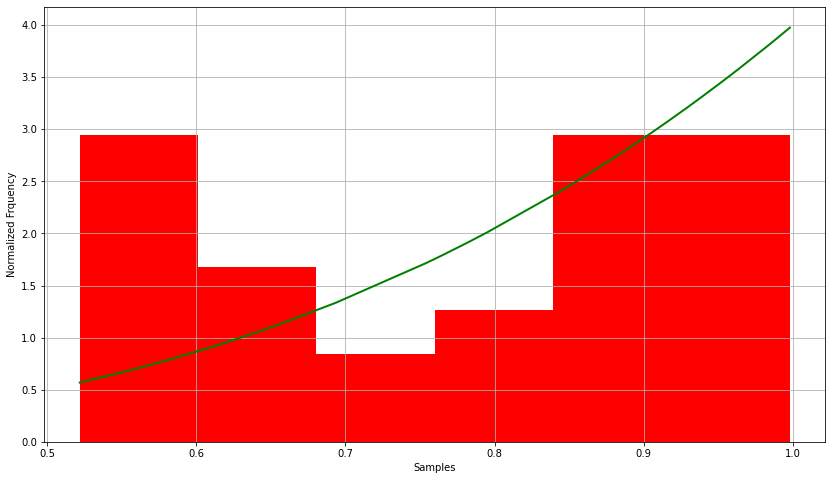

In [7]:
beta30 = pd.read_csv('data/beta30.csv')

x2 = np.sort(beta30['x'])

a=4
b=1
y = beta.pdf(x2, a, b, loc=0, scale=1)

plt.figure(figsize=(14,8))

plt.hist(beta30['x'],bins=int(len(beta30)/5),color='r',density=True)
plt.plot(x2,y,linewidth=2,color='g')
plt.xlabel('Samples')
plt.ylabel('Normalized Frquency')
plt.grid()
plt.show()

(b) Using the results of Exercise $6.2.12,$ compute the maximum likelihood estimate based on the data.

In [8]:
mysum = 0

for x in list(beta30['x']):
    mysum = mysum+np.log(x)

tmle = -1*len(beta30['x'])/mysum
print(tmle)

3.5470715021659394


(c) Using the confidence interval found in Part (c) of Exercise $6.2.12,$ compute the $95\%$ confidence interval for $\theta$ based on the data. Is the confidence interval successful?

In [9]:
n=2*len(beta30)

In [10]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

In [11]:
(tmle*invert_chi2(0.025,n)/n,tmle*invert_chi2(0.975,n)/n)

(2.39318356710974, 4.924383374614426)

#### Exercise 6.2.14. 

Consider sampling on the random variable $X$ with the pdf given in Exercise $6.2.9$.

(a) Obtain the corresponding cdf and its inverse. Show how to generate observations from this distribution.

(b) Write an R function that generates a sample on $X$.

(c) Generate a sample of size $50$ and compute the unbiased estimate of $\theta$ discussed in Exercise $6.2.9$. Use it and the Central Limit Theorem to compute a $95\%$ confidence interval for $\theta$.

(a) CDF is $$F_X(x) = 1-\left ( \frac{\theta}{x+\theta}\right )^3, \:\:\:\: 0 < x < \infty, \: 0 < \theta < \infty.$$

If $U$ is a uniform random variable, then a sample realization $u$ of $U$ can be used to generate that of $X$ by using the inverse cdf namely $$x = \theta \left ( \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 3]{\frac{1}{1-u}} - 1\right ).$$

In [12]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [13]:
alpha = 1-95/100
zh = invert_norm(1-alpha/2)
zl = invert_norm(alpha/2)
print((zl,zh))

(-1.9598388671875, 1.9598388671875)


In [14]:
# (b) and (c)

theta=2

n=50
u=np.random.uniform(0,1,n)
z=[theta*((1/(1-ui))**(1/3)-1) for ui in u]

tmle=2*np.mean(z)
print(tmle)

2.8143258840557115


In [15]:
print((tmle*(1+zl/np.sqrt(n)),(tmle*(1+zh/np.sqrt(n)))))

(2.0342986803498144, 3.5943530877616086)


#### Exercise 6.2.15. 

By using expressions $(6.2.21)$ and $(6.2.22),$ obtain the result for the one-step estimate discussed at the end of this section.



I am not sure about the following but it is nevertheless my reasoning. 

In $6.2.21$ and $6.2.22$, the equations still hold for any $\theta$ and not just for $\theta_0$. Equation $6.2.22$ and Theorem $5.1.4$ imply $$\frac{-n}{l'' \left (\hat{\theta}^{(0)} \right)} \xrightarrow{P} \frac{1}{I \left (\hat{\theta}^{(0)} \right )}.$$

Using the above, Equation $6.2.21$ and Slutsky's Theorem $5.2.4$, we get $$\frac{-\sqrt{n}l'(\hat{\theta}^{(0)})}{l''\left (\hat{\theta}^{(0)} \right )} \xrightarrow{D} N \left (0,\frac{1}{I \left (\hat{\theta}^{(0)}\right)} \right ),$$ and along with Equation $6.2.32$, we get $$\sqrt{n} \left ( \hat{\theta}^{(1)} - \hat{\theta}^{(0)} \right )\xrightarrow{D} N \left (0,\frac{1}{I \left (\hat{\theta}^{(0)}\right)} \right ).$$

As mentioned on page $371$ right after example $6.2.5$, $I(\theta)$ is continuous in $\theta$ and my guess for the reason is the aditional regularity condition $R5$. As $\hat{\theta}^{(0)}$ is consistent, we have that $I(\hat{\theta}^{(0)}) \xrightarrow{P} I(\theta_0)$ (also mentioned on page $371$ except that here, $\hat{\theta}^{(0)}$ is not really the mle but is just a consistent estimator). Hence we can finally conclude that $$\sqrt{n} \left ( \hat{\theta}^{(1)} - \hat{\theta}^{(0)} \right )\xrightarrow{D} N \left (0,\frac{1}{I (\theta_0) }\right ),$$ that is, the one-step estimate is an asymptotically efficient estimate of $\theta$.

#### Exercise 6.2.16

Solutions are given in Tomoki Okuno's solutions, as well as in the solutions manual. Not worth typing it again here!